In [20]:
import numpy as np
from numpy import sin, cos, exp, pi
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

import ipywidgets as widgets
from ipywidgets import interact, IntSlider, FloatSlider

%load_ext autoreload
%autoreload 2

from plucked_string_functions import make_static_mode_plot, animate_mode, ic_plot
from plucked_string_animations import animate_plucked_string 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# plucking a guitar string
## Fourier analysis module IV
### Joseph E. McEwen, (c) 2021

**Note:** *This is version 1. Typos and mistakes likely. Alert Joe to any errrors you catch.* 

**For students in physics 223 spring 2021 only. No permission granted for distribution or copying**

**This is a first version. It is a work in progress. Alert me to any errors.**

The standard textbook solution for a standing wave is $y(x,t)= 2 A \sin(kx) \cos(\omega t)$, where $k=2\pi/\lambda$ (at least half a wavelength must fit into a length $L$). The more general solution is a any linear combination of the following products of sines and cosines 
\begin{align} 
\begin{split} 
& y(x,t) \propto \sin(kx) \cos(\omega t)~,  \\
& y(x,t) \propto \cos(kx) \cos(\omega t)~,  \\
& y(x,t) \propto \sin(kx) \sin(\omega t)~,  \\
& y(x,t) \propto \cos(kx) \sin(\omega t)~.
\end{split}
\end{align} 

## Plucked guitar string 
The vibration of a guitar string can be composed of linar combinations of standing waves. The plucked guitar string has **boundary conditions**, a constraint on the solution at the boundary positions. In our case the boundary positions are at $x=0$ and $x=L$. The string is fixed at these points and therefore not allowed to move, thus $y(x=0,t)=0$ and $y(x=L,t)=0$. Applying the boundary condition disqualifies two of the options above and therefor the displacement of the string is 

\begin{align} 
y(x,t) \propto \cos(\omega t ) \sin(kx) + \sin(\omega t) \sin(kx) ~. 
\end{align} 

**problem 1:** *Why do the boundary conditions eliminate two of the candiate solutions and which two are eliminated?* 

We now write the solution as a linear combination of $N$ modes, each mode having a wave number $k_n= n\pi/L$ and frequency $\omega_n=2 \pi f_n=  (\pi  n/L)v$, where 
$v = \sqrt{T/\mu}$ is the wave speed 
\begin{align} 
y(x,t) = \displaystyle \sum_{n=1}^N a_n \cos(\omega_n t) \sin\left(\frac{n\pi}{L} x\right) + b_n \sin(\omega_n t) \sin\left(\frac{n\pi}{L} x\right)  ~, 
\end{align} 

The values of $a_n$ and $b_n$ are determined from **initial conditions**. The initial conditions for a plucked guitar string are the initial position of the string and the initial velocity of the string (let us call the velocity of the string $u(x,t)=dy/dt$. The initial conditions correspond to $t=0$. The postion and velocity at $t=0$ are

\begin{align} 
y(x,t=0) = \displaystyle \sum_{n=1}^N a_n  \sin\left(\frac{n\pi}{L} x\right)   ~, 
\end{align}

\begin{align} 
u(x,t=0) = \displaystyle \sum_{n=1}^N b_n \omega_n \sin\left(\frac{n\pi}{L} x\right)   ~, 
\end{align}


**problem 2:** *Using $v = \lambda_n f_n$ and $\omega_n=2 \pi f_n$, show that $\omega_n=   (\pi  n/L)v$.* 

**problem 3:** *What is the difference between the two velocities $v$ and $u(x,t)$. 

**problem 4:** *Prove the initial condition equations ($y(x,0)$ and $u(x,0)$ ) above starting from the equation for $y(x,t)$.* 

**problem 5:** *The figure below shows three modes. What is the wavelength for each mode? What is the mode number? What is the $k_n$ value for each mode? What is the amplitude for each mode?* 


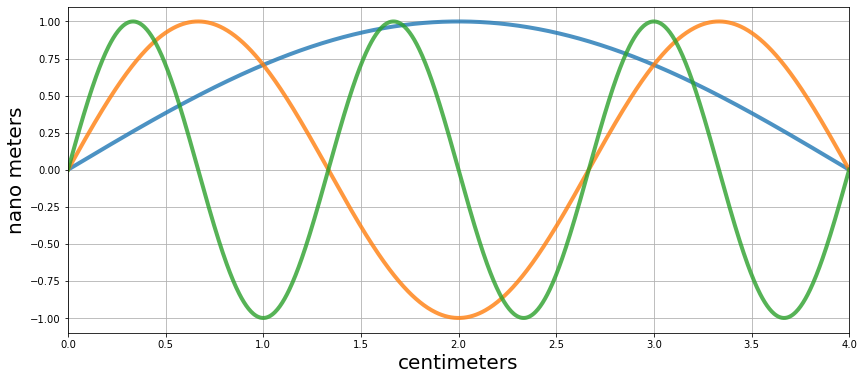

In [10]:
make_static_mode_plot()

In [11]:
print("Select n value in the line n=xx line. It takes some time for the animation to be produced, be patient")
n=10
anim=animate_mode(n) 
HTML(anim.to_jshtml())

Select n value in the line n=xx line. It takes some time for the animation to be produced, be patient


**problem 6:** *Starting from the expressoin for $y(x,0)$ and $u(x,0)$ show the that coefficients can be determined (using the usual Fourier series approach) from the following expressions*

\begin{align} 
a_n = \frac{2}{L}\int_0^L y(x,0) \sin\left(\frac{n\pi}{L} x\right)dx ~, 
\end{align} 

\begin{align} 
b_n = \frac{w}{\omega_n L} \int_0^L u(x,0) \sin\left(\frac{n\pi}{L} x\right) dx~. 
\end{align} 

The initial condition is to move the string to a heieght $h$ at a location $d$, $0\leq d \leq L$. The string is then released from rest. The mathematical expression for the initial position is as follows 
\begin{align} 
y(x,0)=\begin{cases} \frac{h}{d}x & \quad \text{for } 0 \leq x \leq d \\
h - h \frac{(x-d)}{L-d}&  \quad \text{for } x > d ~. 
\end{cases} 
\end{align} 

**problem 7:** *Show that the above expression is true. This will be your argument in your own words, but it needs to be sound.*

**problem 8:** *We release the string from rest. What does that mean about the initial velcoity $u(x,0)$? What does that mean about the values of $b_n$.*

The plot below shows the initial condition $y(x,t=0)$. 

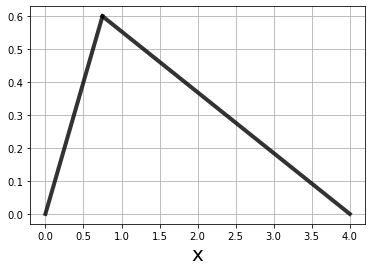

In [4]:
ic_plot()

### determining the coefficients $a_n$ 

We have our expression for $y(x,0)$. We can apply the usual Fourier series method to determine the coefficients, i.e. carry out the integral 

\begin{align} 
a_n = \frac{2}{L}\int_0^L y(x,0) \sin\left(\frac{n\pi}{L} x\right)dx ~.
\end{align} 

**problem 7:** *Show that the $a_n$ are* 
\begin{align} 
a_n = \frac{2h}{n^2 \pi^2} \frac{L^2}{d(L-d)} \sin\left( \frac{d n \pi}{L} \right) ~. 
\end{align} 

*The expression for $y(x,0)$ is piecewise and therefor you will need to break the integral up into two parts. Additionaly you will need to perform integration by parts. However, you can use a website like [Wolfram Alpha](https://www.wolframalpha.com/input/?i=x+sin%28A+x%29+) to do this for you.* 

Our final expression can now be written as 

**problem 8:** *I say that the $a_n$ get smaller and smaller as $n$ increases, why is that so?* 

Below is an animation of the plucked string. The thick black line is the sum of Fourier modes. Each colored line is a single mode. You can change the values of d, L, mass, T, and h in the cell below. It does take some time to make the animation, so be patient

In [22]:
# values to change if you like
d=.8
L=4
mass=1
T=1
h=.5

# make animation here
anim=animate_plucked_string(d,h,L,T,mass)
HTML(anim.to_jshtml())

In the above animation you see that the blue mode is the first mode. You know this for two reasons. One, it has a wavelength of $2L$. Two, it has the largest amplitude. Remember we determined that the amplitudes decrease with increasing $n$. 

Here is a [link](https://www.youtube.com/watch?v=_X72on6CSL0) to a video an actual plucked string. You can compare our mathematical solution to the real deal! What do you think? 

### what did we miss
**problem 9:** *Why do the vibrations of a real string decay?* 